In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
import cv2

In [2]:
img = cv2.imread('Emily-In-Paris-gray.png', cv2.IMREAD_GRAYSCALE)
# cv2.imshow('gray', original_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [3]:
height, width = img.shape
height, width

(450, 750)

In [4]:
neighborhood = sparse.lil_matrix((height-2 * width-2, height-2 * width-2)) # 335104 * 335104

In [31]:
def weight_f(mean, var, r, s): # option 2
    return 1 + ((r-mean)*(s-mean))/var

numbering = 0

for j in range(1, width-1):
    for i in range(1, height-1):
        r = img[i][j]
        s = [img[i-1][j-1], img[i-1][j], img[i-1][j+1],
            img[i][j-1], img[i][j+1], 
            img[i+1][j-1], img[i+1][j], img[i+1][j+1]]
        
        n_mean, n_var = np.mean(s), np.var(s)
        weight_s = [weight_f(n_mean, n_var, r, i) for i in s]
        norm_s = weight_s / np.sum(weight_s)
        
        neighborhood[numbering, numbering-height+1] = norm_s[0]
        neighborhood[numbering, numbering-height+2] = norm_s[3]
        neighborhood[numbering, numbering-height+3] = norm_s[5]
        
        neighborhood[numbering, numbering-1] = norm_s[1]
        neighborhood[numbering, numbering+1] = norm_s[6]
        
        neighborhood[numbering, numbering+height-3] = norm_s[2]
        neighborhood[numbering, numbering+height-2] = norm_s[4]
        neighborhood[numbering, numbering+height-1] = norm_s[7]
        
        numbering += 1
print(numbering)

/tmp/ipykernel_9301/3560375628.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return 1 + ((r-mean)*(s-mean))/var


335104


In [23]:
neighborhood[:10, :10].toarray()

array([[0.        , 0.2       , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.16666667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.25      , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.14285714, 0.        , 0.14285714,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.2       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.2       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.14285714, 0.        , 0.14285714, 0.        , 0.        ],
       [0.        , 0.        , 0.       

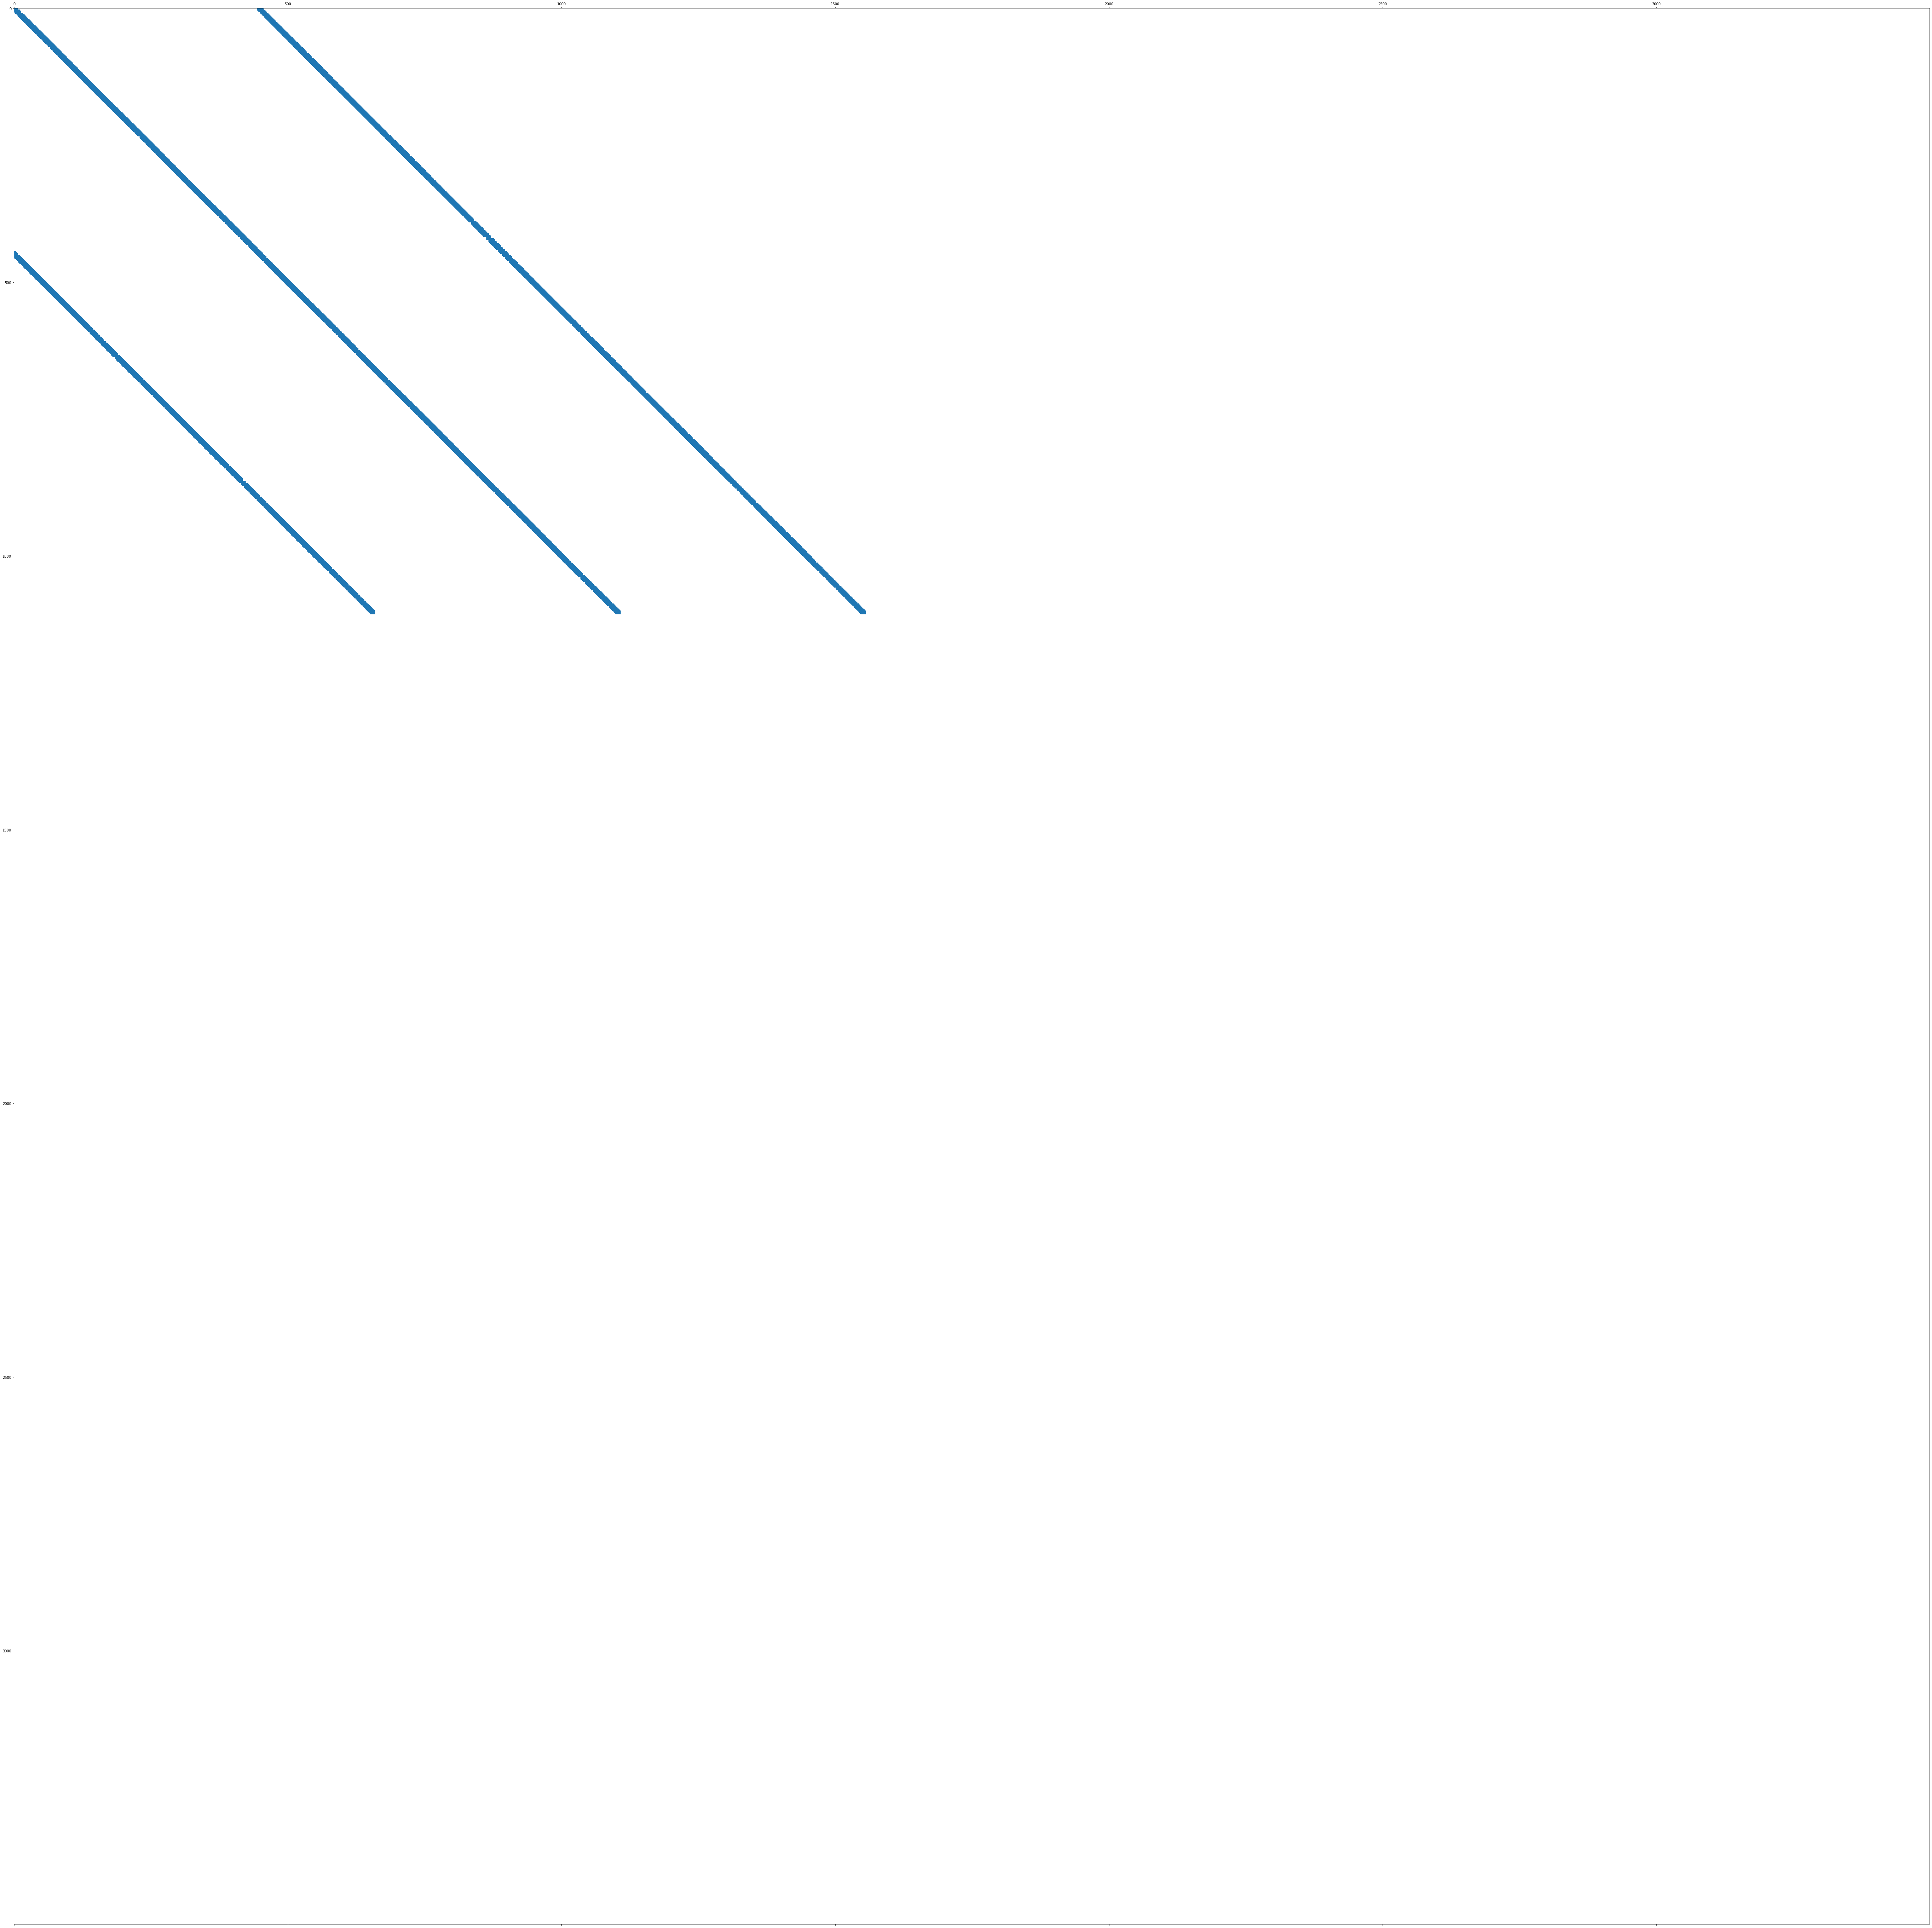

In [30]:
plt.figure(figsize=(100,100))
plt.spy(neighborhood[334000:, 334000:])
plt.show()